In [ ]:
import cv2
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import models, transforms

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
# create model
vgg19 = tf.keras.applications.VGG19(weights="imagenet", include_top=False, input_shape=(32,32,3))
model = Sequential()
for layer in vgg19.layers:
    model.add(layer)
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# model = models.vgg19(pretrained=True)
# print(model)

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
label_table = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
import random

y_train = tf.reshape(y_train,shape=[-1])
y_test = tf.reshape(y_test,shape=[-1])

# for i in range(10):
#     r = random.randint(0,1000)
#     cv2.imshow(label_table[y_train[r]], x_train[r])
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
print(y_train[0])

y_train = tf.one_hot(y_train, depth=10)

print(y_train[0])

y_test = tf.one_hot(y_test, depth=10)

print("x_train", x_train.shape)
print("y_train", y_train.shape)

In [ ]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=30, batch_size=1000)
model.save("2022cvdl-vgg19.h5")

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
my_model = tf.keras.models.load_model('./my_vgg19.h5')

In [ ]:
prediction=my_model.evaluate(x_test,y_test)
print(prediction)

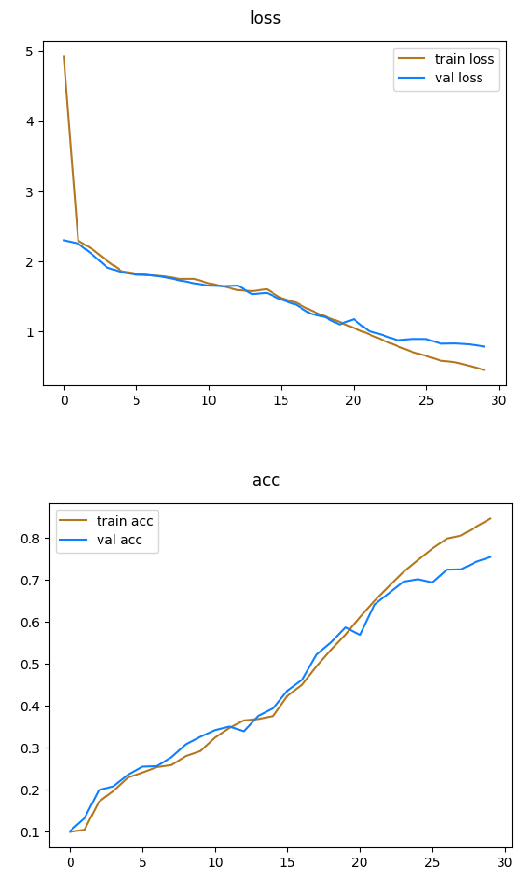

In [16]:
import numpy, cv2
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(7,11))

img1 = cv2.imread("../imgs/loss.png")
img2 = cv2.imread("../imgs/acc.png")
axs[0].imshow(img1)
axs[0].title.set_text("loss")
axs[0].axis('off')
axs[1].imshow(img2)
axs[1].title.set_text("acc")
axs[1].axis('off')

plt.show()